# What I did this Week

1. Applied mass cut, relative velocity cut, and isolation cut to a sample of dark matter subhalos from COCOWDM1 simulations, according to specifications
of Hartl, et al.
2. Met with research group corroborate results regarding these cuts, and the number of subhalo pairs that are unique, and could be analogs to the local group cluster (Milkyway and M31 galaxy)

# Motivation

We hope ultimately to compare mass estimators using the virial theorem and the 'timing argument' for the local group (LG) which consists of the Milkyway Galaxy and M31 (Andromeda), as well as several satelites. At this stage, we have imported data from a snapshot (COCOWDM simulations), using Cosma. From this data we extract important subhalo parameters including subhalo coordinates, velocities, masses, and use these to eliminate subhalos that don't fit astronomical observations.

# What happened during the last weeks

The first thing: 
Using virgodc package, get the important parameters including subhalo position, velocity, mass, and get a sense of the distribution of subhalo masses.
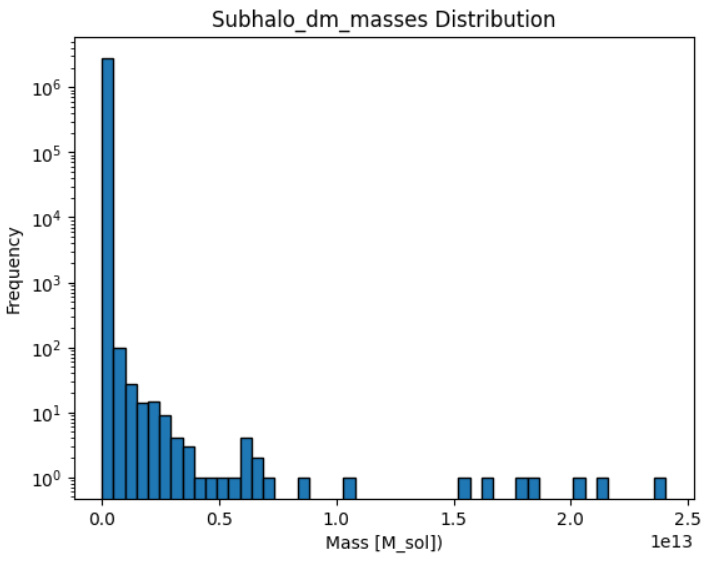


I then performed a mass cut, using a numpy array subhalo_dm_masses which contains the masses of 
the subhalos (in solar masses). The minimum and max masses are 0.5e12 and 5e12 [1].




mass_cut1_indices = np.where((subhalo_dm_masses <= 5e12) & (subhalo_dm_masses >= 5e11))[0] 


subhalo_pairs = [] # represent indices of possible pairings
for i, halo1 in enumerate(mass_cut1_indices): 
    for j, halo2 in enumerate(mass_cut1_indices):
        if i<j:
            displacement = np.linalg.norm(subhalo_pos[halo1] - subhalo_pos[halo2])
            if 500 <= displacement <= 1000:
                subhalo_pairs.append([int(halo1),int(halo2)])
            
This block of code finds the indices of subhalos that satisfy the mass requirements, and then
finds acceptable pairings of subhalos that satisfy the requirement that their distance be between 500 and 1000 kpcs.

The output:

[[15517, 15520], [15518, 15519], [15518, 15520], [15519, 15522], [15520, 15521], [15520, 15522], [21075, 21076], [54146, 54147], [55410, 83761], [60093, 60094], [75730, 101584], [87542, 99213], [88377, 99883]]

represents a list filled with sublists. Each sublist represents a possible pairing, though some pairings have an index that is also present in another pair. These are removed later on. There are a total of 13 pairs at this point.





The next block of code applies the second requirement that any subhalo with a Vmax>150km/s cannot be within 1 Mpc of the center of mass of each pairing.

barycenters = [] # parallel list structure to subhalo_pairs
for pairing in subhalo_pairs:
    index1, index2 = pairing
    mass1 = subhalo_dm_masses[index1]
    mass2 = subhalo_dm_masses[index2]
    position1 = subhalo_pos[index1]
    position2 = subhalo_pos[index2]
    barycenter = ((mass1*position1)+(mass2*position2))/(mass1+mass2)
    barycenters.append(barycenter)

The above block computes the barycenter. Index1, and index2 represent the indices of the subhalos in each pair as before. SubhaloVmax150 below takes only subhalos satisfying vmax>150

subhaloVmax150 = np.where(subhalo_Vmax >150)[0] 

The next block of code then applies the isolation cut described above

pairing_bool = [] # list of bool, Each element is either T or F, if T, then pairing has a subhalo with too high speed <1mpc from barycenter
for i in range(len(subhalo_pairs)):
    index1, index2 = subhalo_pairs[i]
    halos = []
    
    halo_too_close = False
    for haloindex in subhaloVmax150:
        if haloindex == index1 or haloindex == index2:
            pass
        else:
            halos.append(haloindex) # adds halo index representing that originla index from subhalo dm masses, excludes the pairing
    for haloindex in halos: #iterate over list, the list exludes indices of the pairing
        if np.linalg.norm(barycenters[i]-subhalo_pos[haloindex]) < 1000:
            halo_too_close = True
       
    pairing_bool.append(halo_too_close)

The first for loop uses boolean logic to determine whether or not a subhalo with vmax>150 is within 1mpc (1000kpc)
Pairing_bool is a list of boolean values, with true meaning the subhalo pairing is too close to another subhalo with vmax>150km/s.

[True, True, True, True, True, True, True, False, False, False, False, False, False]

6 False values indicate that 6 pairings make it through the cut.



Another cut is made requiring the relative velocity between any two subhalos is negative (moving towards one another).

r_vel_cut_pairs = [] #keeps only pairs with relative velocity <0
for pair in new_pairings:
    index1,index2 = pair
    radial_unit_vector = (subhalo_pos[index2]-subhalo_pos[index1])/(np.linalg.norm(subhalo_pos[index2]-subhalo_pos[index1]))
    # radial unit vector points to subhalo at index 1, from index 2
    velocity_difference = np.dot(subhalo_vel[index2]-subhalo_vel[index1],radial_unit_vector)
    if velocity_difference <0:
        r_vel_cut_pairs.append(pair)


In essence, this block of code defines a radial unit vector using their positions, then takes the scalar projection of their relative velocities. If this radial component is negative, the pair is kept. All 6 pairs are kept after this cut.
Another cut ensuring any remainders do not have a Vmax>150km/s is also done. No halos are eliminate.
The final results of these cuts are given
[[54146, 54147], [55410, 83761], [60093, 60094],[75730, 101584], [87542, 99213], [88377, 99883]]
where each pairing has unique indices not found in other pairs. 

Throughout the process, various  sanity checks were done, to ensure that all cuts were made correctly. 

# Meaning Of Results

When comparing results between our group at our meeting, we found general agreement, however both partners agree that there are in fact 7 subhalo pairings left, thus some revision may be needed on my part. 
Other than that there is very little to report other than I have 6 unique pairings that satisfy the initial requirements imposed as in Hartl, et al [1], which is my primary guiding literature.


# Next Step

The next thing to do is to fully corroborate our results by comparing our individual pairings with each other to confirm we got the same answer. A final isolation cut will be applied, originally we were to apply a cut based on the luminosity of the subhalos, however this does not appear to be a parameter we can access. Instead we will peform a final mass cut ensuring that no subhalo with mass greater than 0.5e12 solar masses is within 3Mpc of each pairing. We will then move to solve the two body problem for each pairing, which will represent the bulk of the work.



# Bibliography

[1]  O. V. Hartl and L. E. Strigari, "Local Group timing argument and virial theorem mass    estimators from cosmological simulations," *Mon. Not. R. Astron. Soc.*, vol. 511, no. 4, pp. 5517-5534, Apr. 2022, doi: 10.3847/2041-8213/ac5c42.
